# Predictive Analysis of Robinhood Popularity Data - Modeling

Purpose: In this module, we pick up from Part Three - where we prepared and scaled our training/test data.

Our goal in Part Four of Modeling is to build and evaluate several algorithms to find an optimal regressor.

We will also spend time tuning the hyperparamters for our models to optimize each model to its fullest potential.

In [1]:
# Importing modules for modeling

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
from pickle import dump, load
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error

In [2]:
# Loading in our data scaler from Part Three

filepath = "../models/scaler.pkl"
scaler = load(open(filepath, 'rb'))

In [3]:
# Loading the training feature set

X_train = pd.read_csv("../data/X_train.csv")
X_train.drop(X_train.columns[0], axis=1, inplace=True)
X_train.head()

,Robinhood,Percentage_Volume,Year,Month,Day,Day_of_Week,Robinhood_Lag1,Robinhood_Lag2,Robinhood_Lag3,Robinhood_Lag4,...,Ticker_NKE,Ticker_NVDA,Ticker_PYPL,Ticker_SNAP,Ticker_SQ,Ticker_T,Ticker_TSLA,Ticker_TWTR,Ticker_V,Ticker_ZNGA
0,0.964764,0.872016,0.002415,2018,7,17,1,150087.0,150117.0,150592.0,...,0,0,0,0,0,0,0,0,0,0
1,0.973085,0.557379,0.002295,2018,7,18,2,150065.0,150087.0,150117.0,...,0,0,0,0,0,0,0,0,0,0
2,0.977209,0.785345,0.001858,2018,7,19,3,150523.0,150065.0,150087.0,...,0,0,0,0,0,0,0,0,0,0
3,0.978826,0.634696,0.001824,2018,7,20,4,150750.0,150523.0,150065.0,...,0,0,0,0,0,0,0,0,0,0
4,0.982279,0.606379,0.002361,2018,7,23,0,150839.0,150750.0,150523.0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Loading the test feature set

X_test = pd.read_csv("../data/X_test.csv")
X_test.drop(X_test.columns[0], axis=1, inplace=True)
X_test.head()

,Robinhood,Percentage_Volume,Year,Month,Day,Day_of_Week,Robinhood_Lag1,Robinhood_Lag2,Robinhood_Lag3,Robinhood_Lag4,...,Ticker_NKE,Ticker_NVDA,Ticker_PYPL,Ticker_SNAP,Ticker_SQ,Ticker_T,Ticker_TSLA,Ticker_TWTR,Ticker_V,Ticker_ZNGA
0,0.779505,0.461336,0.001491,2019,12,30,0,214377.0,212717.0,211278.0,...,0,0,0,0,0,0,0,0,0,0
1,0.787103,0.479143,0.002139,2019,12,31,1,214931.0,214377.0,212717.0,...,0,0,0,0,0,0,0,0,0,0
2,0.810165,0.543044,0.001608,2020,1,2,3,215640.0,214931.0,214377.0,...,0,0,0,0,0,0,0,0,0,0
3,0.822060,0.509965,0.001496,2020,1,3,4,217792.0,215640.0,214931.0,...,0,0,0,0,0,0,0,0,0,0
4,0.821888,0.529464,0.001849,2020,1,6,0,218902.0,217792.0,215640.0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Loading the training target set

y_train = pd.read_csv("../data/y_train.csv")
y_train.drop(y_train.columns[0], axis=1, inplace=True)
y_train.head()

,ExPost_PriceChange_1D,ExPost_PriceChange_5D,ExPost_PriceChange_10D,ExAnte_PriceChange_1D,ExAnte_PriceChange_3D,ExAnte_PriceChange_5D
0,0.002829,0.005779,0.022812,-0.005484,-0.000052,0.008096
1,-0.005484,0.013413,0.035233,0.007773,0.006355,0.023214
2,0.007773,0.004450,0.034952,-0.002293,0.005837,0.012143
3,-0.002293,0.000575,0.018460,0.000888,0.017656,-0.002403
4,0.000888,0.003667,0.005405,0.007254,0.013569,-0.008872


In [6]:
# Loading the test target set

y_test = pd.read_csv("../data/y_test.csv")
y_test.drop(y_test.columns[0], axis=1, inplace=True)
y_test.head()

,ExPost_PriceChange_1D,ExPost_PriceChange_5D,ExPost_PriceChange_10D,ExAnte_PriceChange_1D,ExAnte_PriceChange_3D,ExAnte_PriceChange_5D
0,0.005935,0.043229,0.059495,0.007307,0.020273,0.023566
1,0.007307,0.033979,0.049275,0.022816,0.020943,0.032488
2,0.022816,0.056566,0.071110,-0.009722,-0.006526,0.030897
3,-0.009722,0.025939,0.063237,0.007968,0.019366,0.043372
4,0.007968,0.034507,0.070638,-0.004703,0.032789,0.057238


In [7]:
# Let's save our feature and target labels

X_labels = X_train.columns.values
print(X_labels)

y_labels = y_train.columns.values
print(y_labels)

['Robinhood' 'Percentage_Volume' 'Year' 'Month' 'Day' 'Day_of_Week'
 'Robinhood_Lag1' 'Robinhood_Lag2' 'Robinhood_Lag3' 'Robinhood_Lag4'
 'Robinhood_Lag5' 'Robinhood_Lag6' 'Robinhood_Lag7'
 'Percentage_Volume_Lag1' 'Percentage_Volume_Lag2'
 'Percentage_Volume_Lag3' 'Percentage_Volume_Lag4'
 'Percentage_Volume_Lag5' 'Percentage_Volume_Lag6'
 'Percentage_Volume_Lag7' 'ExPost_PriceChange_1D_Lag1'
 'ExPost_PriceChange_1D_Lag2' 'ExPost_PriceChange_1D_Lag3'
 'ExPost_PriceChange_1D_Lag4' 'ExPost_PriceChange_1D_Lag5'
 'ExPost_PriceChange_1D_Lag6' 'ExPost_PriceChange_1D_Lag7' 'SMA_3D'
 'SMA_5D' 'SMA_10D' 'Expanded_Mean' 'Ticker_AAPL' 'Ticker_AMD'
 'Ticker_AMZN' 'Ticker_BABA' 'Ticker_FB' 'Ticker_GOOGL' 'Ticker_INTC'
 'Ticker_JPM' 'Ticker_MSFT' 'Ticker_NFLX' 'Ticker_NKE' 'Ticker_NVDA'
 'Ticker_PYPL' 'Ticker_SNAP' 'Ticker_SQ' 'Ticker_T' 'Ticker_TSLA'
 'Ticker_TWTR' 'Ticker_V' 'Ticker_ZNGA']
['ExPost_PriceChange_1D' 'ExPost_PriceChange_5D' 'ExPost_PriceChange_10D'
 'ExAnte_PriceChange_1D' 'ExAnte_P

# Algorithm 1 - SVM Regression

First, let's try Support Vector Machine Regression (SVM) and optimize each model using hyperparamter tuning.

The relevant hyperparamters for SVM are C (regularization), gamma (kernel coefficient), and the kernel - which we will stick to the default of radial basis function or rbf. 

In [8]:
#Note: each algorithm block can be run independently of one another

from sklearn.svm import SVR

param_grid1 = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}

N_targets = len(y_labels)

# Lists to keep track of the best models, errors, fit, predict times across the multiple targets
SVM_models = []
SVM_errors = []
SVM_fit_times = []
SVM_predict_times = []

for i in range(N_targets):
    
    # Setting up the estimator and Grid Search 5-fold CV
    estimator1 = SVR()
    grid_search1 = GridSearchCV(estimator = estimator1, param_grid = param_grid1, n_jobs=-1, verbose=3)
    
    # Fitting the data and also tracking the fit times
    start=time.time()
    grid_search1.fit(X_train,y_train.iloc[:,i])
    end=time.time()
    SVM_fit_times.append(end-start)
    
    # Outputting the best model parameters from our Grid Search
    SVM_models.append(grid_search1.best_estimator_)
    print('Best SVM Model for ' + y_labels[i] + ': ' + str(SVM_models[i]))
    
    # Predicting using our fitted model and also tracking the predict times
    start=time.time()
    y_pred = SVM_models[i].predict(X_test)
    end=time.time()
    SVM_predict_times.append(end-start)
    
    # Tracking the RMSE for each model
    SVM_errors.append(mean_squared_error(y_test.iloc[:,i],y_pred, squared=False))
    print('RMSE for ' + y_labels[i] + ': ' + str(SVM_errors[i]))
    
    # Outputting the fit and predict times for each model
    print('Fit time (seconds)' + ': ' + str(SVM_fit_times[i]))
    print('Predict time (seconds)' + ': ' + str(SVM_predict_times[i]))


Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 102 out of 125 | elapsed:    2.9s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    2.9s finished


Best SVM Model for ExPost_PriceChange_1D: SVR(C=1, gamma=0.0001)
RMSE for ExPost_PriceChange_1D: 0.03968665365302518
Fit time (seconds): 3.185997724533081
Predict time (seconds): 0.010998725891113281
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    4.0s finished


Best SVM Model for ExPost_PriceChange_5D: SVR(C=1, gamma=0.001)
RMSE for ExPost_PriceChange_5D: 0.08077804721837101
Fit time (seconds): 4.50801157951355
Predict time (seconds): 0.07799911499023438
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    8.3s finished


Best SVM Model for ExPost_PriceChange_10D: SVR(C=1, gamma=0.001)
RMSE for ExPost_PriceChange_10D: 0.11048981909597941
Fit time (seconds): 9.129003047943115
Predict time (seconds): 0.1699979305267334
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 102 out of 125 | elapsed:    0.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    0.7s finished


Best SVM Model for ExAnte_PriceChange_1D: SVR(C=1, gamma=0.0001)
RMSE for ExAnte_PriceChange_1D: 0.03973454692407731
Fit time (seconds): 0.9290001392364502
Predict time (seconds): 0.010998725891113281
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 102 out of 125 | elapsed:    1.8s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    2.0s finished


Best SVM Model for ExAnte_PriceChange_3D: SVR(C=1, gamma=1)
RMSE for ExAnte_PriceChange_3D: 0.06241421814081731
Fit time (seconds): 2.3000097274780273
Predict time (seconds): 0.03799843788146973
Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:    3.9s finished


Best SVM Model for ExAnte_PriceChange_5D: SVR(C=1, gamma=1)
RMSE for ExAnte_PriceChange_5D: 0.08109881950355158
Fit time (seconds): 4.375000238418579
Predict time (seconds): 0.07799935340881348


# Algorithm 2 - K Nearest Neighbors Regression

Second, let's try K Nearest Neighbors (KNN) Regression and optimize each model using hyperparamter tuning.

The relevant hyperparameters for KNN are leaf_size, n_neighbors (number of neighbors), and p - 1 corresponds to the L1 Manhattan metric and 2 corresponds to the L2 Euclidean metric.

In [9]:
#Note: each algorithm block can be run independently of one another

from sklearn.neighbors import KNeighborsRegressor

param_grid2 = {'leaf_size': range(1,50,5),  
              'n_neighbors': range(1,30), 
              'p': [1,2]}

N_targets = len(y_labels)

# Lists to keep track of the best models, errors, fit, predict times across the multiple targets
KNN_models = []
KNN_errors = []
KNN_fit_times = []
KNN_predict_times = []

for i in range(N_targets):
    
    # Setting up the estimator and Grid Search 5-fold CV
    estimator2 = KNeighborsRegressor()
    grid_search2 = GridSearchCV(estimator = estimator2, param_grid = param_grid2, n_jobs=-1, verbose=3)
    
    # Fitting the data and also tracking the fit times
    start=time.time()
    grid_search2.fit(X_train,y_train.iloc[:,i])
    end=time.time()
    KNN_fit_times.append(end-start)
    
    # Outputting the best model parameters from our Grid Search
    KNN_models.append(grid_search2.best_estimator_)
    print('Best KNN Model for ' + y_labels[i] + ': ' + str(KNN_models[i]))
    
    # Predicting using our fitted model and also tracking the predict times
    start=time.time()
    y_pred = KNN_models[i].predict(X_test)
    end=time.time()
    KNN_predict_times.append(end-start)
    
    # Tracking the RMSE for each model
    KNN_errors.append(mean_squared_error(y_test.iloc[:,i],y_pred, squared=False))
    print('RMSE for ' + y_labels[i] + ': ' + str(KNN_errors[i]))
    
    # Outputting the fit and predict times for each model
    print('Fit time (seconds)' + ': ' + str(KNN_fit_times[i]))
    print('Predict time (seconds)' + ': ' + str(KNN_predict_times[i]))

Fitting 5 folds for each of 580 candidates, totalling 2900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed:   20.7s
[Parallel(n_jobs=-1)]: Done 2024 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done 2900 out of 2900 | elapsed:   34.3s finished


Best KNN Model for ExPost_PriceChange_1D: KNeighborsRegressor(leaf_size=1, n_neighbors=29, p=1)
RMSE for ExPost_PriceChange_1D: 0.03997505152508999
Fit time (seconds): 34.58099937438965
Predict time (seconds): 0.07200121879577637
Fitting 5 folds for each of 580 candidates, totalling 2900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 952 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 1528 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 2232 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done 2900 out of 2900 | elapsed:   33.3s finished


Best KNN Model for ExPost_PriceChange_5D: KNeighborsRegressor(leaf_size=1, n_neighbors=29, p=1)
RMSE for ExPost_PriceChange_5D: 0.08343614765047043
Fit time (seconds): 33.593998193740845
Predict time (seconds): 0.0709991455078125
Fitting 5 folds for each of 580 candidates, totalling 2900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 952 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 1528 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 2232 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 2877 out of 2900 | elapsed:   33.3s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 2900 out of 2900 | elapsed:   33.4s finished


Best KNN Model for ExPost_PriceChange_10D: KNeighborsRegressor(leaf_size=1, n_neighbors=29)
RMSE for ExPost_PriceChange_10D: 0.11575369601190362
Fit time (seconds): 33.735010623931885
Predict time (seconds): 0.20999956130981445
Fitting 5 folds for each of 580 candidates, totalling 2900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 952 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 1528 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 2232 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 2877 out of 2900 | elapsed:   33.4s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 2900 out of 2900 | elapsed:   33.6s finished


Best KNN Model for ExAnte_PriceChange_1D: KNeighborsRegressor(leaf_size=1, n_neighbors=29, p=1)
RMSE for ExAnte_PriceChange_1D: 0.04007392378050608
Fit time (seconds): 33.89701247215271
Predict time (seconds): 0.07100105285644531
Fitting 5 folds for each of 580 candidates, totalling 2900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 952 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 1528 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 2232 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done 2877 out of 2900 | elapsed:   34.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 2900 out of 2900 | elapsed:   34.3s finished


Best KNN Model for ExAnte_PriceChange_3D: KNeighborsRegressor(leaf_size=1, n_neighbors=29, p=1)
RMSE for ExAnte_PriceChange_3D: 0.06389203935479772
Fit time (seconds): 34.57200026512146
Predict time (seconds): 0.07099723815917969
Fitting 5 folds for each of 580 candidates, totalling 2900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 952 tasks      | elapsed:   14.3s
[Parallel(n_jobs=-1)]: Done 1528 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 2232 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 2877 out of 2900 | elapsed:   33.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 2900 out of 2900 | elapsed:   34.1s finished


Best KNN Model for ExAnte_PriceChange_5D: KNeighborsRegressor(leaf_size=1, n_neighbors=29, p=1)
RMSE for ExAnte_PriceChange_5D: 0.08361848645699327
Fit time (seconds): 34.41101121902466
Predict time (seconds): 0.07199907302856445


# Algorithm 3 - Gradient Boosted Machine Regression

Finally, let's try Gradient Boosted Machine (GBM) Regression and optimize each model using hyperparamter tuning.

The relevant hyperparameters for GBM are n_estimators (number of boosting stages), learning_rate (controls the contribution of each tree), max_depth (maximum depth of te individual regression estimators), and min_samples_leaf (minimum number of sampels required to be at each leaf node).

In [10]:
#Note: each algorithm block can be run independently of one another

from sklearn.ensemble import GradientBoostingRegressor

param_grid3 = {'n_estimators':[100, 500, 1000], 
               'learning_rate': [0.1],
               'max_depth':[4, 6, 8], 
               'min_samples_leaf':[2, 5, 8]}

N_targets = len(y_labels)

# Lists to keep track of the best models, errors, fit, predict times across the multiple targets
GBM_models = []
GBM_errors = []
GBM_fit_times = []
GBM_predict_times = []

for i in range(N_targets):
    
    # Setting up the estimator and Grid Search 5-fold CV
    estimator3 = GradientBoostingRegressor()
    grid_search3 = GridSearchCV(estimator = estimator3, param_grid = param_grid3, n_jobs=-1, verbose=3)
    
    # Fitting the data and also tracking the fit times
    start=time.time()
    grid_search3.fit(X_train,y_train.iloc[:,i])
    end=time.time()
    GBM_fit_times.append(end-start)
    
    # Outputting the best model parameters from our Grid Search
    GBM_models.append(grid_search3.best_estimator_)
    print('Best GBM Model for ' + y_labels[i] + ': ' + str(GBM_models[i]))
    
    # Predicting using our fitted model and also tracking the predict times
    start=time.time()
    y_pred = GBM_models[i].predict(X_test)
    end=time.time()
    GBM_predict_times.append(end-start)
    
    # Tracking the RMSE for each model
    GBM_errors.append(mean_squared_error(y_test.iloc[:,i],y_pred, squared=False))
    print('RMSE for ' + y_labels[i] + ': ' + str(GBM_errors[i]))
    
    # Outputting the fit and predict times for each model
    print('Fit time (seconds)' + ': ' + str(GBM_fit_times[i]))
    print('Predict time (seconds)' + ': ' + str(GBM_predict_times[i]))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed: 10.4min finished


Best GBM Model for ExPost_PriceChange_1D: GradientBoostingRegressor(max_depth=4, min_samples_leaf=8, n_estimators=1000)
RMSE for ExPost_PriceChange_1D: 0.013019266196539604
Fit time (seconds): 676.4830572605133
Predict time (seconds): 0.027998924255371094
Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed: 10.6min finished


Best GBM Model for ExPost_PriceChange_5D: GradientBoostingRegressor(max_depth=4, min_samples_leaf=2, n_estimators=1000)
RMSE for ExPost_PriceChange_5D: 0.009088556477699872
Fit time (seconds): 691.588529586792
Predict time (seconds): 0.026999473571777344
Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed: 10.5min finished


Best GBM Model for ExPost_PriceChange_10D: GradientBoostingRegressor(max_depth=4, min_samples_leaf=2, n_estimators=1000)
RMSE for ExPost_PriceChange_10D: 0.01289229786682064
Fit time (seconds): 685.8478288650513
Predict time (seconds): 0.025998592376708984
Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed: 10.3min finished


Best GBM Model for ExAnte_PriceChange_1D: GradientBoostingRegressor(max_depth=8, min_samples_leaf=5)
RMSE for ExAnte_PriceChange_1D: 0.04070243340125489
Fit time (seconds): 628.1426687240601
Predict time (seconds): 0.008997917175292969
Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   19.5s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed: 10.2min finished


Best GBM Model for ExAnte_PriceChange_3D: GradientBoostingRegressor(max_depth=8, min_samples_leaf=2)
RMSE for ExAnte_PriceChange_3D: 0.06801438254723491
Fit time (seconds): 619.8400003910065
Predict time (seconds): 0.008999824523925781
Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed: 10.7min finished


Best GBM Model for ExAnte_PriceChange_5D: GradientBoostingRegressor(max_depth=8, min_samples_leaf=5)
RMSE for ExAnte_PriceChange_5D: 0.09105686019694777
Fit time (seconds): 653.5530989170074
Predict time (seconds): 0.009000301361083984


# Model Results  / Analysis

In this section, we'll be reviewing the results of the optimal models generated by the three algorithms.

We will be reviewing the RMSE, fit and predict times to evaluate the effectiveness of each algorithm and model.

In [28]:
# First, let's shape our output so it can be easily plotted for seaborn visualization

# SVM output
df_SVM = pd.DataFrame(np.vstack([SVM_errors, SVM_fit_times, SVM_predict_times]).T,
                      columns=['RMSE', 'Fit_Time', 'Predict_Time'])
df_SVM['Algorithm']='SVM'
df_SVM['Target']=y_labels

# KNN output
df_KNN = pd.DataFrame(np.vstack([KNN_errors, KNN_fit_times, KNN_predict_times]).T,
                      columns=['RMSE', 'Fit_Time', 'Predict_Time'])
df_KNN['Algorithm']='KNN'
df_KNN['Target']=y_labels

# GBM output
df_GBM = pd.DataFrame(np.vstack([GBM_errors, GBM_fit_times, GBM_predict_times]).T,
                      columns=['RMSE', 'Fit_Time', 'Predict_Time'])
df_GBM['Algorithm']='GBM'
df_GBM['Target']=y_labels

# Finally, let's merge all the datasets together
df_RMSE = pd.concat([df_SVM, df_KNN, df_GBM]).reset_index(drop=True)
df_RMSE

,RMSE,Fit_Time,Predict_Time,Algorithm,Target
0,0.039687,3.185998,0.010999,SVM,ExPost_PriceChange_1D
1,0.080778,4.508012,0.077999,SVM,ExPost_PriceChange_5D
2,0.110490,9.129003,0.169998,SVM,ExPost_PriceChange_10D
3,0.039735,0.929000,0.010999,SVM,ExAnte_PriceChange_1D
4,0.062414,2.300010,0.037998,SVM,ExAnte_PriceChange_3D
5,0.081099,4.375000,0.077999,SVM,ExAnte_PriceChange_5D
6,0.039975,34.580999,0.072001,KNN,ExPost_PriceChange_1D
7,0.083436,33.593998,0.070999,KNN,ExPost_PriceChange_5D
8,0.115754,33.735011,0.210000,KNN,ExPost_PriceChange_10D
9,0.040074,33.897012,0.071001,KNN,ExAnte_PriceChange_1D


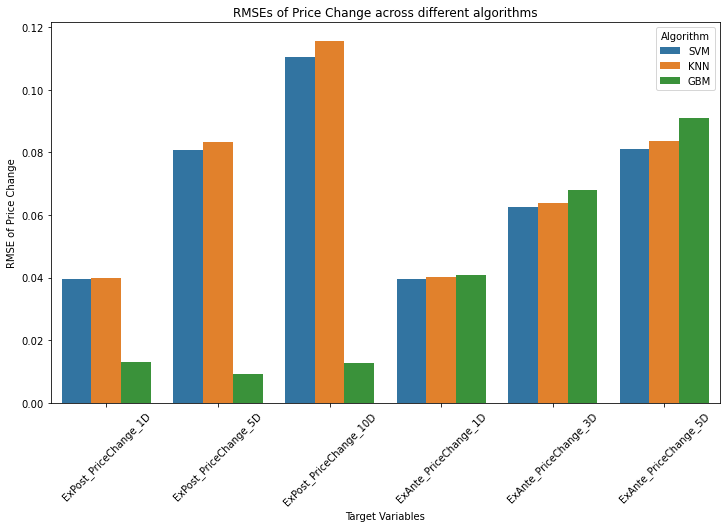

In [35]:
# Let's plot the RMSE errors for each of our targets across each of the algorithms

fig, ax = plt.subplots(figsize=(12,7))
plt.title('RMSEs of Price Change across different algorithms')
plt.xticks(rotation=45)
_ = sns.barplot(data=df_RMSE, x='Target', y='RMSE', hue='Algorithm', ax = ax)
_ = ax.set(xlabel='Target Variables', ylabel='RMSE of Price Change')

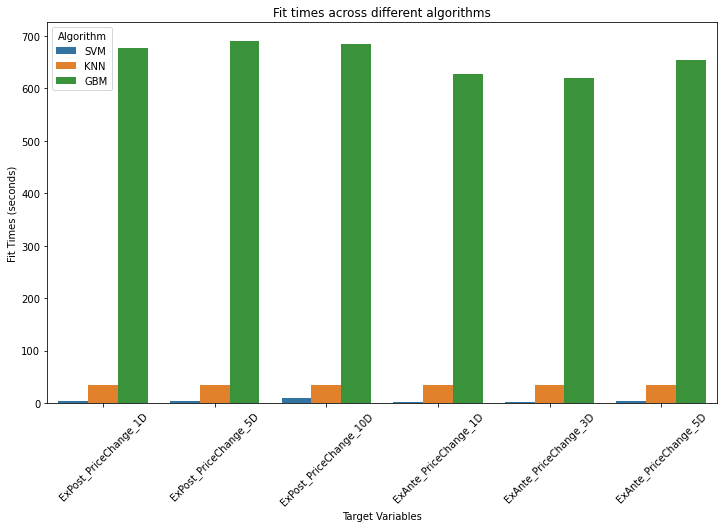

In [36]:
# Similar plot for the fit / training times

fig, ax = plt.subplots(figsize=(12,7))
plt.title('Fit times across different algorithms')
plt.xticks(rotation=45)
_ = sns.barplot(data=df_RMSE, x='Target', y='Fit_Time', hue='Algorithm', ax = ax)
_ = ax.set(xlabel='Target Variables', ylabel='Fit Times (seconds)')

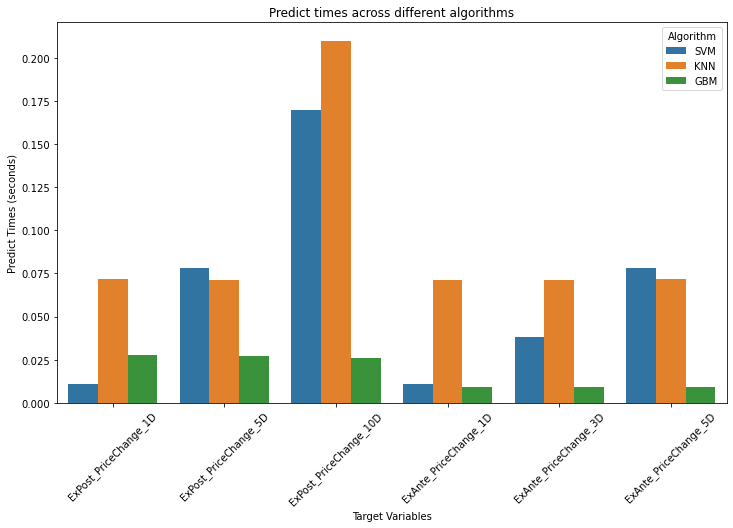

In [39]:
# Similar plot for the predict times

fig, ax = plt.subplots(figsize=(12,7))
plt.title('Predict times across different algorithms')
plt.xticks(rotation=45)
_ = sns.barplot(data=df_RMSE, x='Target', y='Predict_Time', hue='Algorithm', ax = ax)
_ = ax.set(xlabel='Target Variables', ylabel='Predict Times (seconds)')

# Observations

Let's first review the set of target features for Ex-Post returns or historical price returns.

The models generated by the Gradient Boosting Machine (GBM) regressions appear to do a consistently better job as measured by the RMSE than the Support Vector Machine (SVM) regressions and the the K Nearest Neighbors (KNN) regressions.

We also note the SVM models do a marginally better job than the KNN models.  Across both the SVM and KNN models, we note that RMSE increases as the time horizon (1-day, 5-day, and 10-day) increases - which makes sense since there is more uncertainty over a longer period.

Interestingly, the RMSEs of the GBM models doesn't vary much across time horizon.  This could be caused by overfitting or due to the particular time period being tested (however, we are limited by the data set available).

Now, let's review the set of target features for the Ex-Ante returns or future predicted returns.

We generally don't expect much predictive power given the random walk nature of the stock market, but it is surprising to see there is some predictive power across shorter time horizons.  In general, the Ex-Ante RMSEs are lower than the Ex-Post RMSEs - which is expected.

Across the different algorithms, we see a tight race with SVM outperfoming KNN, and GBM being the worst performer in terms of RMSE.  This is consistent with our earlier hypothesis that the GBM models may be overfitting the dataset more so than the SVM or KNN models.

Finally, let's turn our attention to the fit and predict times across the three models.

These extra variables may or may not be important based on the business context.

For example, if these models were used in a live trading environment, the predict and test times may be of critical importance.  However, if they're being used on a large dataset as part of a reseach paper, it would be much less important.

Not surprisingly, we find that the fit / training times for the GBM to be the largest.  The fit times for the KNN and SVM models are significantly shorter, with the SVM having the shortest times.

Turning our attention to the predict times, the GBM models have the shortest times as comparedt to the SVM and KNN models. The KNN models appear to have the largest predict times including the greatest variabiltiy across the target features.


# Conclusion

So which algorithm is the most optimal?

Short answer: it depends!

If fit/predict times are not relevant, than the GBM models is the most optimal for Ex-Post returns, and the SVM models are the most optimal (marginally) for Ex-Ante returns.

If fit or predict times are important, than we should avoid using the GBM models. The SVM models is the most optimal in this case with a good balance between performance (lower RMSE) and fit and predict times.

The KNN models appear to be a suboptimal choice in general for this problem.


